In [1]:
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [20]:
sns.set(rc={'figure.figsize':(21,8)})

In [2]:
apvo = pd.read_csv('../data/prep/apvo_dataset.csv')
ssps = pd.read_csv('../data/prep/ssps_dataset.csv')

In [3]:
metres_wd = apvo[apvo.mesure == 'м']

In [4]:
dataset = apvo.merge(ssps, on=['date', 'machine_type', 'machine_number'], how='inner')

In [5]:
dataset['month'] = dataset['date'].values.astype('datetime64[M]')

In [6]:
data_m = dataset[dataset.mesure == 'м']

In [7]:
def to_float(r):
    try:
        return float(r)
    except:
        return 0

In [8]:
data_m.columns

Index(['date', 'machine_type', 'machine_number', 'company_x', 'type', 'volume',
       'work_area', 'work_kind', 'value', 'mesure', 'work_done_pas', 'window',
       'company_y', 'au12', 'rate_norm', 'rate_fact', 'low_rate', 'up_rate',
       'residue', 'month'],
      dtype='object')

In [9]:
data_m.rate_norm = data_m.rate_norm.apply(to_float)
data_m.rate_fact = data_m.rate_fact.apply(to_float)
data_m.low_rate = data_m.low_rate.apply(to_float)
data_m.up_rate = data_m.up_rate.apply(to_float)
data_m.residue = data_m.residue.apply(to_float)

In [60]:
data_m_agr_mtype = data_m.groupby(by=['date', 'machine_type']).sum()

In [62]:
data_m_agr_mtype = data_m_agr_mtype.reset_index()

<AxesSubplot:xlabel='month', ylabel='value'>

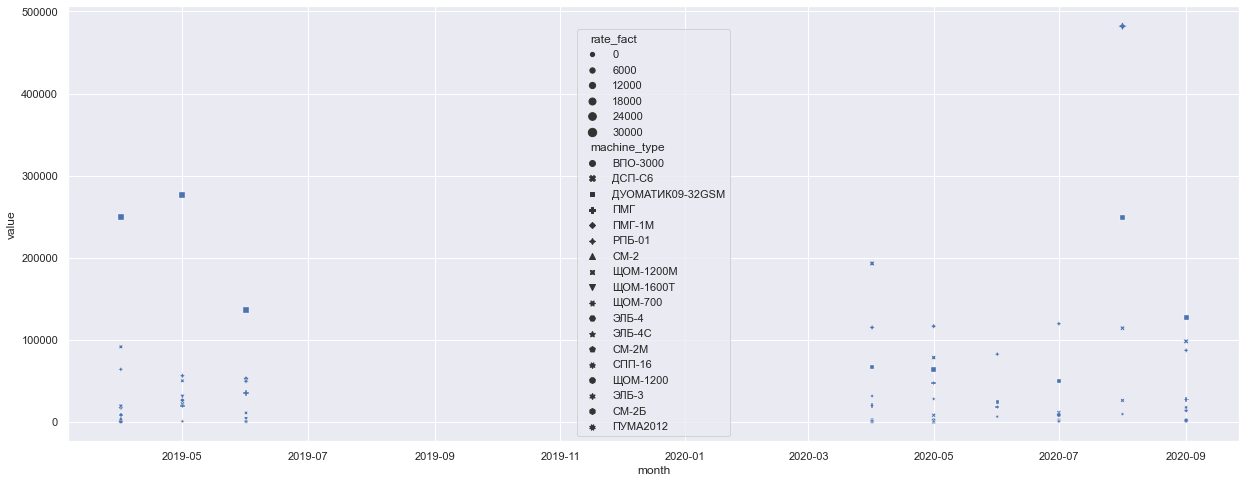

In [31]:
sns.scatterplot(data=data_m_agr_mtype, x="month", y="value", size="rate_fact", style="machine_type")

<AxesSubplot:xlabel='month', ylabel='rate_fact'>

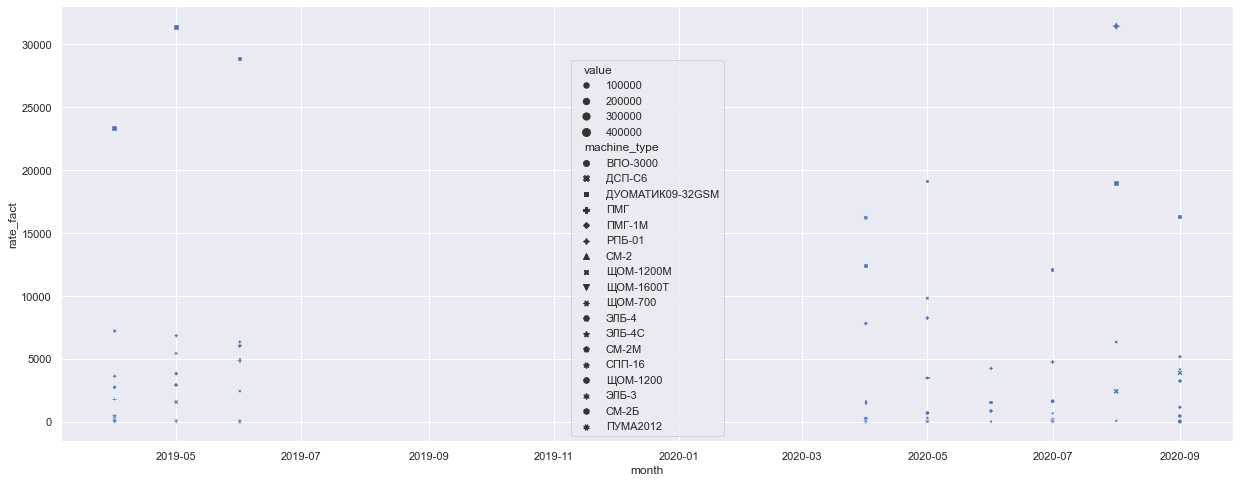

In [40]:
sns.scatterplot(data=data_m_agr_mtype, x="month", y="rate_fact", size="value", style="machine_type")

<AxesSubplot:xlabel='date', ylabel='value'>

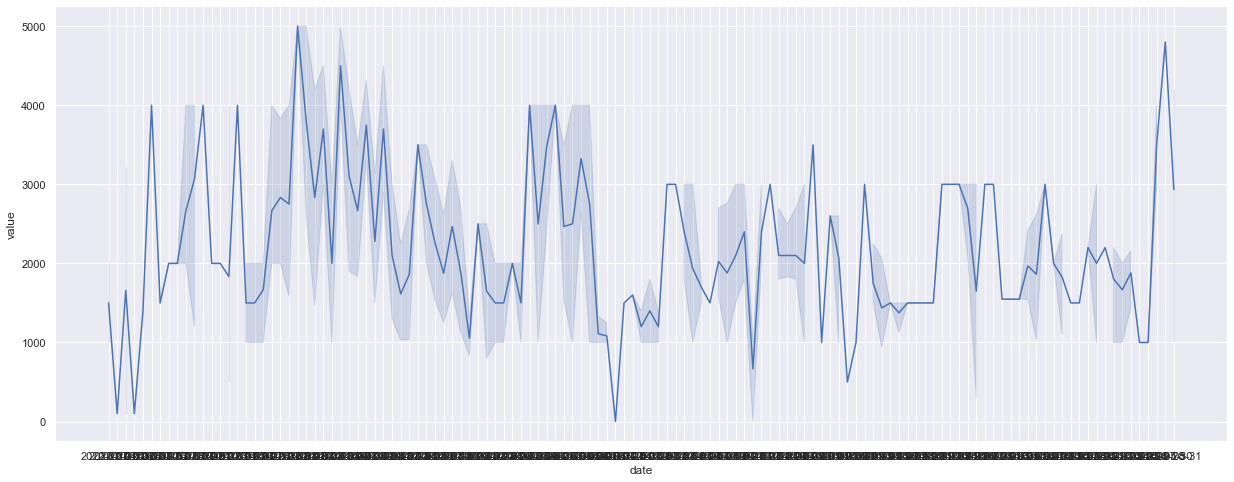

In [106]:
sns.lineplot(data=data_m[(data_m.machine_type == 'РПБ-01') & (data_m.date > '2020-04-01')], x="date", y="value")

<AxesSubplot:xlabel='date', ylabel='rate_fact'>

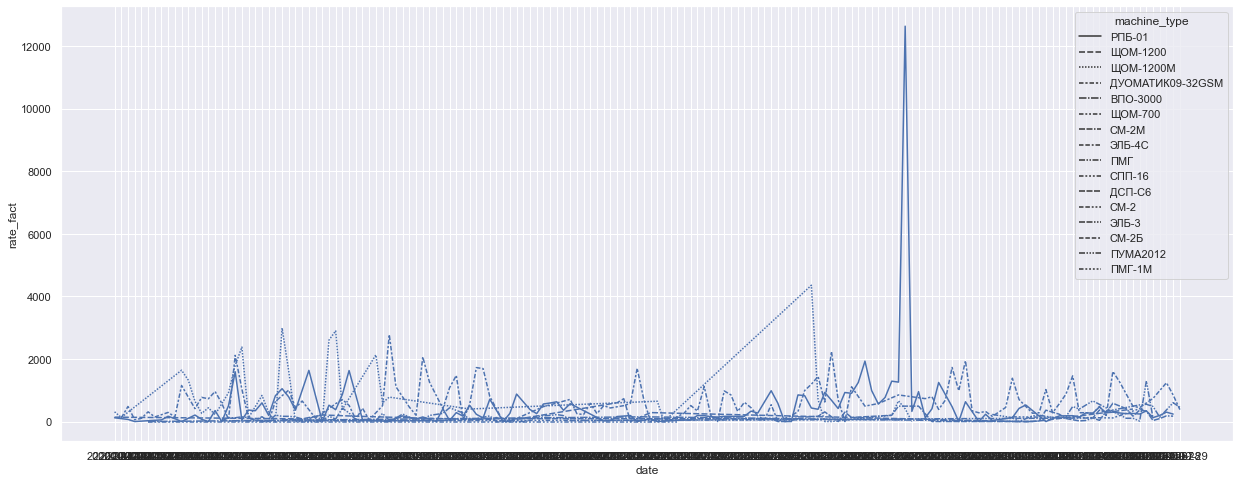

In [64]:
sns.lineplot(data=data_m_agr_mtype[data_m_agr_mtype.date > '2020-04-01'], x="date", y="rate_fact", style="machine_type")

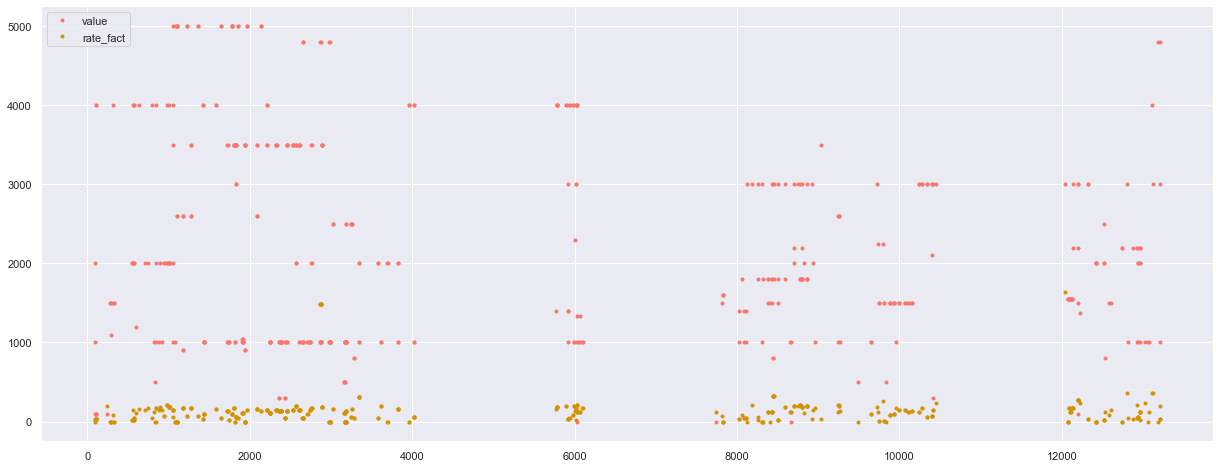

In [99]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = data_m[['date', 'value', 'rate_fact']][(data_m.machine_type == 'РПБ-01') & (data_m.date > '2020-04-01')].plot(style='.', color=color_pal)

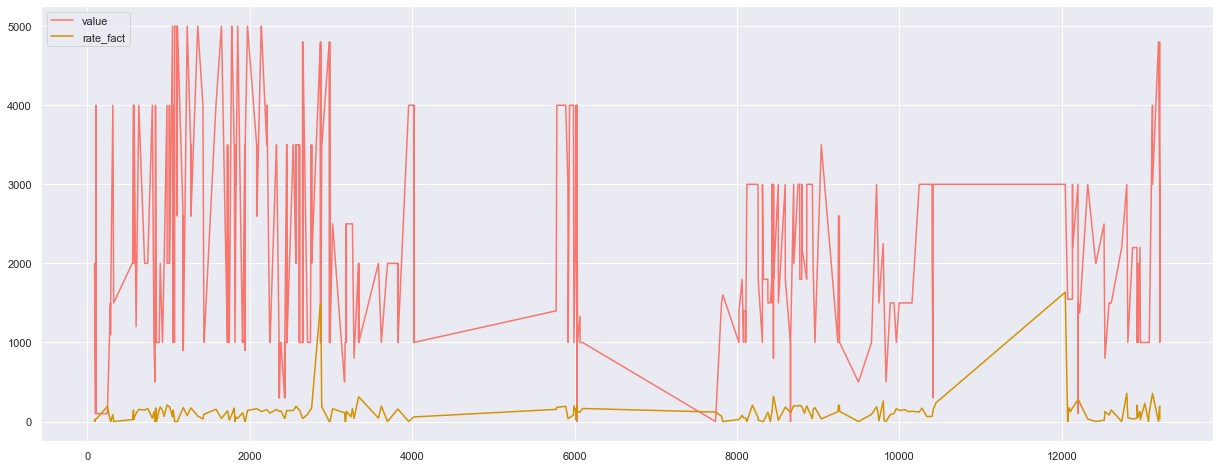

In [79]:
_ = data_m[['date', 'value', 'rate_fact']][(data_m.machine_type == 'РПБ-01') & (data_m.date > '2020-04-01')].plot(color=color_pal)

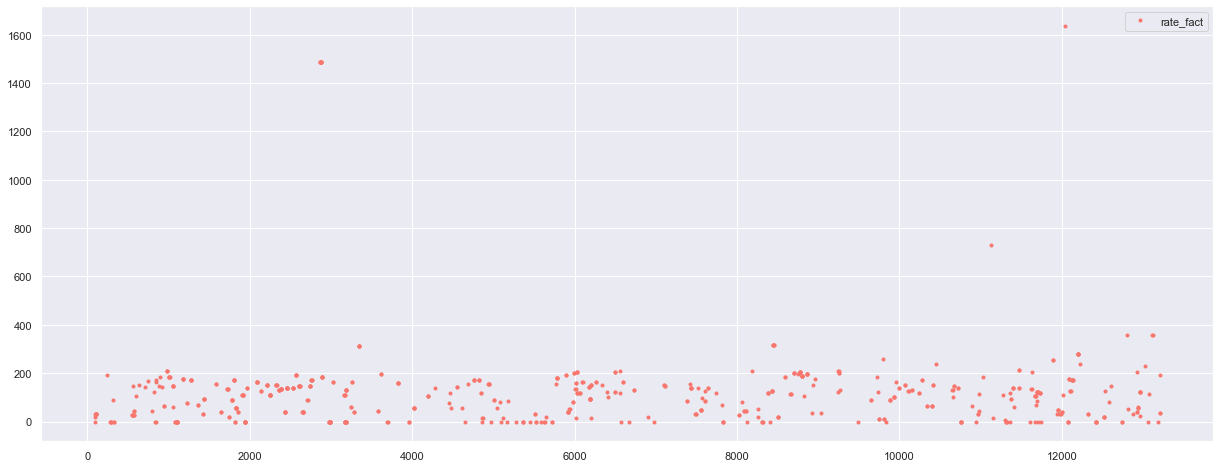

<AxesSubplot:>

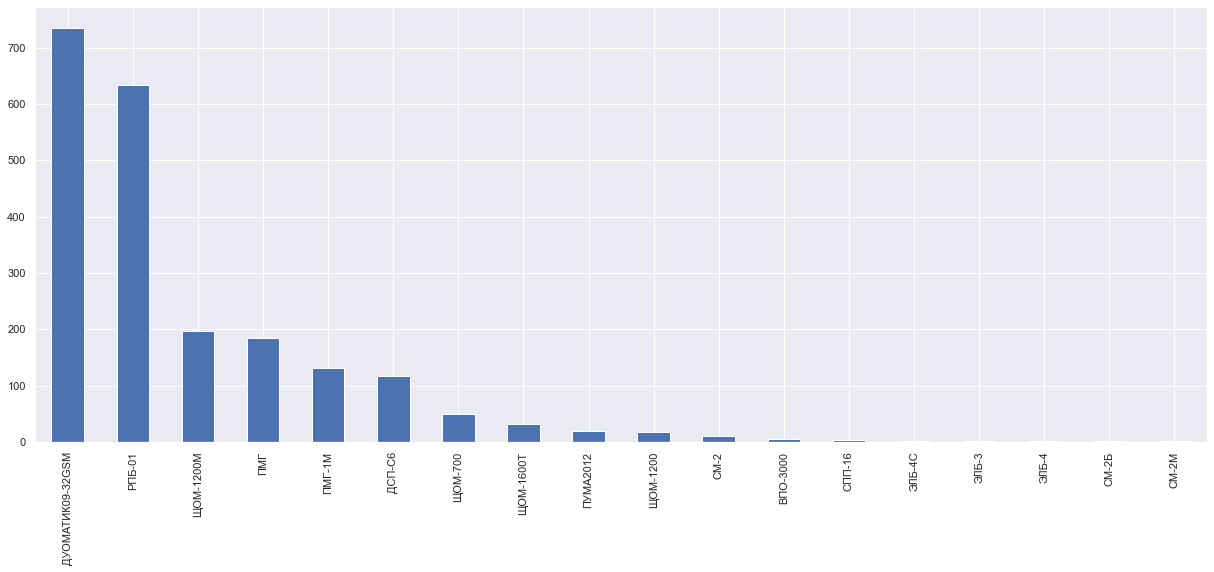

In [82]:
data_m['machine_type'].value_counts().plot(kind='bar')

In [89]:
rating = data_m_agr_mtype.groupby(by=['date', 'machine_type']).sum()

In [92]:
rating = rating.reset_index()

In [95]:
rating.to_csv('../data/for_rating.csv', index=False)

In [97]:
rating.columns

Index(['date', 'machine_type', 'value', 'company_y', 'au12', 'rate_norm',
       'rate_fact', 'low_rate', 'up_rate', 'residue'],
      dtype='object')

In [98]:
columns_map = {
    "date": "Дата работ",
    "machine_type": "Серия машины",
    "value": "Вып. объем физич.",
    "company_y": "Предприятие",
    "au12": "АУ-12",
    "rate_norm": "Расход топлива по норме",
    "rate_fact": "Расход топлива по фактический",
    "low_rate": "Экономия",
    "up_rate": "Перерасход",
    "residue": "Остаток в баках на конец периода"
}